# 96-well plate analysis:
## Graphical representation of two parameters

I need to create a plot that is mostly colorblind friendly that can display a 96-well plate that has two measured values.

Import relevant modules.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline

In [2]:
def plotplateimage(X, Y, Color, Size, Colorlabel, Sizelabel, png_name, resolution):
    fig, ax = plt.subplots()

    cm = plt.cm.get_cmap('viridis_r')

    scatter = plt.scatter(X, Y, c=Color, s=Size*60, 
                    cmap=cm, marker='o', edgecolors='black')
    
    ax.tick_params(labelsize=14) # To set text size for ticklabels

    ax.set_ylim(ax.get_ylim()[::-1]) # To reverse axis

    # To design grid
    ax.grid(which='major', color='white', linewidth = 0)
    ax.grid(which='minor', linewidth = 1)
    ax.xaxis.set_major_locator(plt.MultipleLocator(1))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))
    ax.yaxis.set_major_locator(plt.MultipleLocator(1))
    ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))
    ax.set_axisbelow(True)

    # To center the scatter points
    plt.xlim(0.5, 12.5)
    plt.ylim(7.5, -0.5)

    cb = inset_axes(ax,
                    width="5%", height="50%", # width and height of parent_bbox
                    loc='lower left', bbox_to_anchor=(1.05, 0., 1, 1),
                    bbox_transform=ax.transAxes, borderpad=0)
    fig.colorbar(scatter, cax=cb, ticks= [-3, 0, 3])
    cb.set_ylabel(Colorlabel, fontsize = 18, rotation= 270, labelpad = 18)


    legend_elements = [Line2D([0], [0], marker='o', color='black', label='Low intensity',
                              markerfacecolor='w', markersize=5, lw=0),
                      Line2D([0], [0], marker='o', color='black', label='High intensity',
                              markerfacecolor='w', markersize=18, lw=0)]

    plt.legend(bbox_to_anchor=(-0.5, 2), loc=2, borderaxespad=0, # places the legend wrt the main plot
               handles=legend_elements, # uses the defined elements above for legend_elements
               handletextpad=1, labelspacing=1.2, 
               title=Sizelabel, title_fontsize = 16, fontsize = 12, frameon=False)

    plt.show() 
    plt.clf()
    fig.savefig(png_name, bbox_inches = "tight", dpi=resolution)

Define the file name and import the relevant data from the file

In [3]:
test1 = "96-well-plate-test.xlsx" 

df1 = pd.read_excel(test1, 'Sheet2') 

df1.head()

,Well,FL-T,FL-K
0,A1,10.000000,9.280000
1,A2,5.987886,1.009489
2,A3,6.725146,0.681101
3,A4,7.775689,5.509620
4,A5,7.456140,0.985164


Split the alpha-numberic representation of the wells into the labels for rows and wells.

The letters are always capitalized, so the regex phrase is simplified.

In [4]:
df1["Row"] = df1['Well'].str.extract('(^[A-Z])', expand = True) 

df1["Column"] = df1['Well'].str.extract('(\d{1,2}$)', expand = True).astype(float)

df1.head(13)

,Well,FL-T,FL-K,Row,Column
0,A1,10.000000,9.280000,A,1.0
1,A2,5.987886,1.009489,A,2.0
2,A3,6.725146,0.681101,A,3.0
3,A4,7.775689,5.509620,A,4.0
4,A5,7.456140,0.985164,A,5.0
5,A6,8.757310,13.699858,A,6.0
6,A7,6.288638,11.114107,A,7.0
7,A8,8.485798,1.751402,A,8.0
8,A9,7.113617,0.958406,A,9.0
9,A10,6.246867,11.610338,A,10.0


Scale the data by the z-score to make the data more interpretable. Because we will use z2 as a size factor in the plot. Two was added to the z2 to make all of the values positive.

In [5]:
# scaling the color and size parameters and checking min and max
c1 = ((df1['FL-T'] - df1['FL-T'].mean())/df1['FL-T'].std())
s1 = (1.5+((df1["FL-K"] - df1["FL-K"].mean())/df1["FL-K"].std()))

print(c1.max(), c1.min())
print(s1.max(), s1.min())

3.210238635711515 -3.8733300816082017
5.318133860985826 0.497086147016091


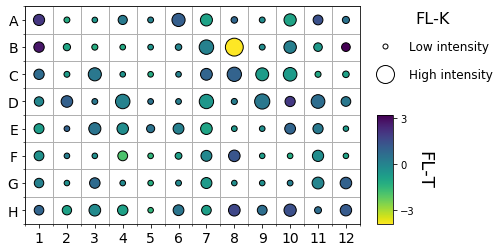

<Figure size 432x288 with 0 Axes>

In [6]:
# plotplateimage(X, Y, Color, Size, Colorlabel, Sizelabel, png_name, resolution)
plotplateimage(df1['Column'], df1['Row'], c1, s1, 
               'FL-T', 'FL-K', 'test2.png', 1200)